In [1]:
# importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Data

In [4]:
time_data=pd.read_csv('delivery_time.csv')
time_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
# EDA

In [6]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
time_data.shape

(21, 2)

In [8]:
time_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [9]:
 #correlation Coefficient

In [10]:
corr_=time_data.corr()   
corr_     

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

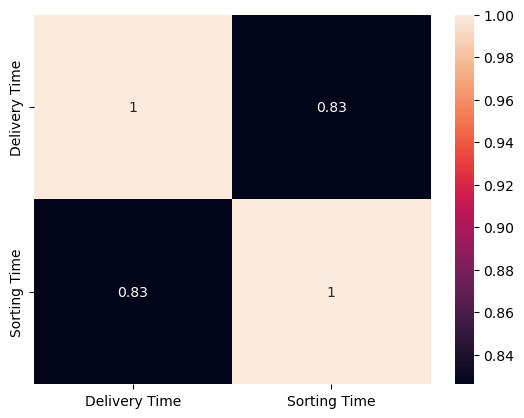

In [11]:
sns.heatmap(corr_,annot=True)

There is a positive correlation between Delivery Time and Sorting Time

In [12]:
#describing our data

In [13]:
time_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


The average Delivery Time and Sorting Time is 16.79 and 6.19 respectively

The minimum delivery time is 8.00 and maximum delivery time is 29.00

The minimum sorting time is 2.00 and maximum sorting time is 10.00

In [14]:
time_data.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

From Skewness we can say that Delivery data is little bit positive skew and Sorting data is symmetric

In [15]:
time_data.kurtosis()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

From Kurtosis we can say that there are no Outliers in our data since it is nearly equal to zero.

In [16]:
#finding null values

In [17]:
time_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

There are no null values in our data

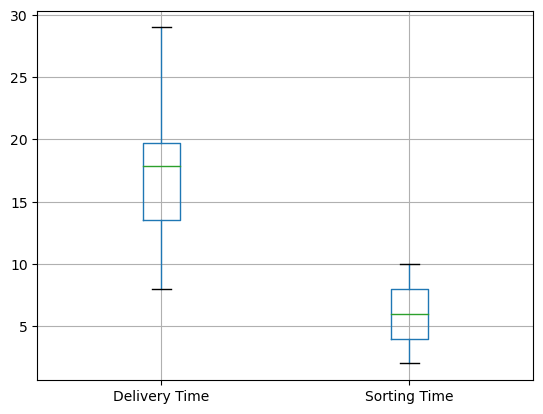

In [18]:
#boxplot
time_data.boxplot()
plt.show()

from above box plot we can say that there are no outliers in our data

In [19]:
#to check linearity

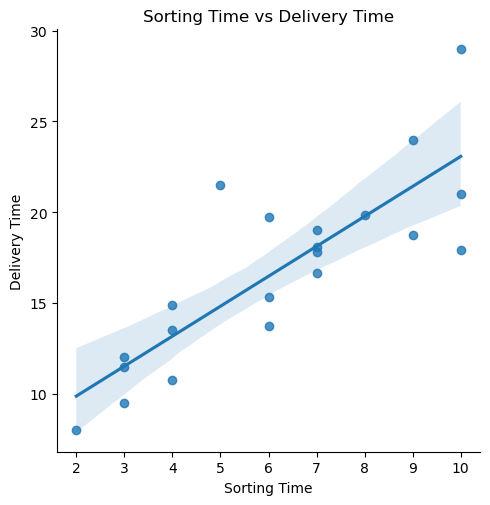

In [20]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=time_data)
plt.title("Sorting Time vs Delivery Time")
plt.show()

In [21]:
#checking Normality

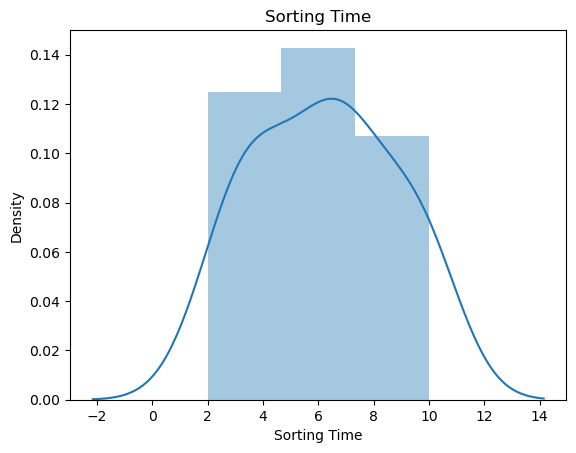

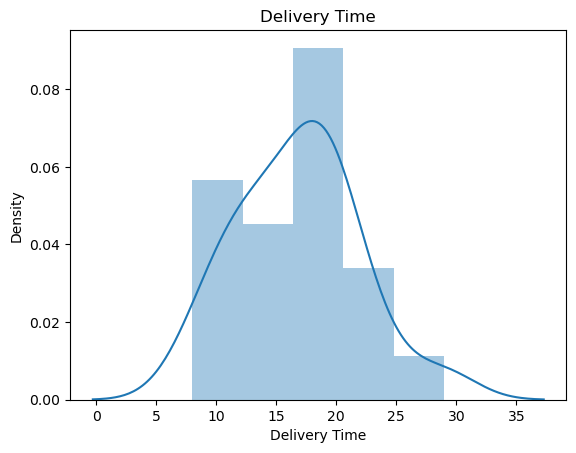

In [22]:
sns.distplot(a=time_data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

sns.distplot(a=time_data['Delivery Time'])
plt.title('Delivery Time')
plt.show()

for Sorting Time most of the data lie within the group 2 - 10
for Delivery Time most of the data lie within the group 10 - 20

In [23]:
# Model Building and Model Training

In [24]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [25]:
time_data.columns=['Delivery','Sorting']       
time_data.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [26]:
#fitting model

In [27]:
linear_model=smf.ols("Delivery~Sorting",data=time_data).fit()

In [28]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        14:33:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#parameters
linear_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [30]:
#t-values and p-values
print(linear_model.tvalues ,'\n', linear_model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [31]:
#R squared values
(linear_model.rsquared,linear_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [32]:
# By Using Log Transformation

In [33]:
time_data['log_sorting']=np.log(time_data['Sorting'])

time_data.head()

,Delivery,Sorting,log_sorting
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


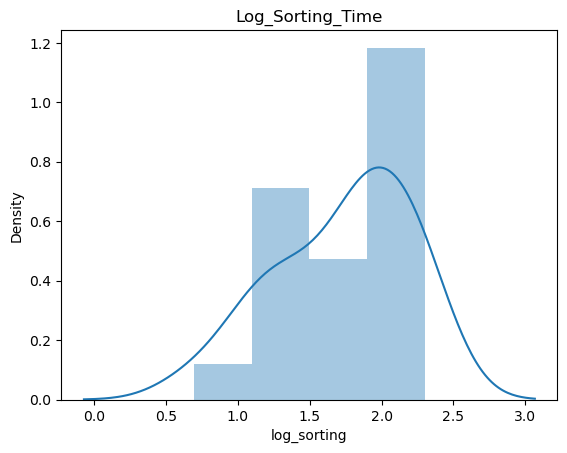

In [34]:
sns.distplot(time_data['log_sorting'])
plt.title("Log_Sorting_Time")
plt.show()

In [35]:
# Model Building by using Log transformation

In [36]:
#fitting model after transforming input variable
linear_model_1=smf.ols("Delivery~log_sorting",data=time_data).fit()

In [37]:
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           2.64e-06
Time:                        14:33:32   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#parameters
linear_model_1.params

Intercept      1.159684
log_sorting    9.043413
dtype: float64

In [39]:
#t-values and p-values
print(linear_model_1.tvalues ,'\n', linear_model_1.pvalues)

Intercept      0.472460
log_sorting    6.586789
dtype: float64 
 Intercept      0.641980
log_sorting    0.000003
dtype: float64


In [40]:
#R squared values
(linear_model_1.rsquared,linear_model_1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

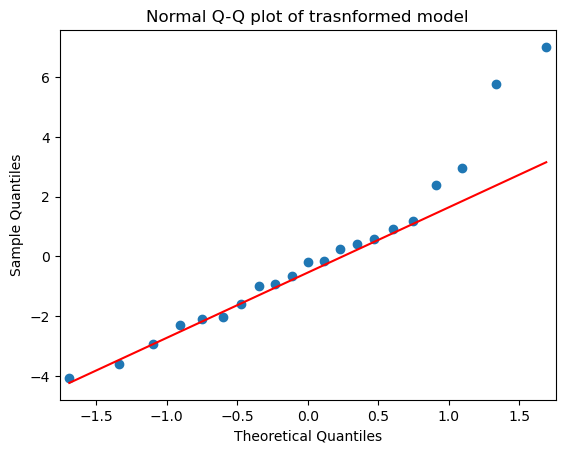

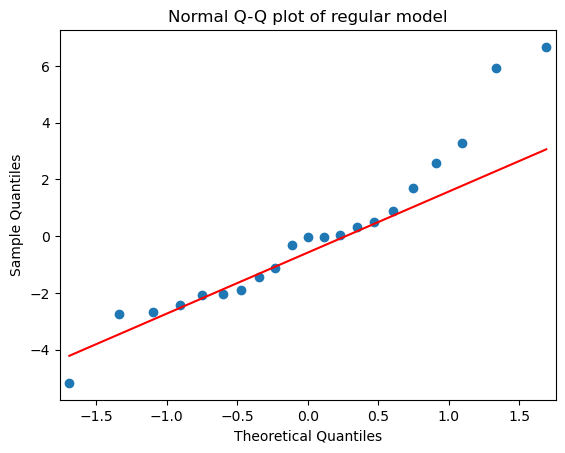

In [41]:
#Normal Q-Q Plot of Residuals for Normality For Transformed Model
sm.qqplot(linear_model_1.resid,line='q')
plt.title('Normal Q-Q plot of trasnformed model')
plt.show()

#Normal Q-Q Plot of Residuals for Normality 
sm.qqplot(linear_model.resid,line='q')
plt.title('Normal Q-Q plot of regular model')
plt.show()

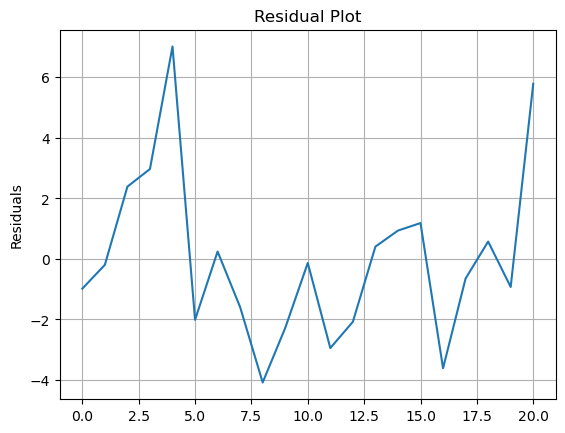

In [42]:
#Residual Plot of transformed  model
plt.plot(linear_model_1.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [43]:
pred_y=linear_model_1.fittedvalues    #predicted values
pred_y.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

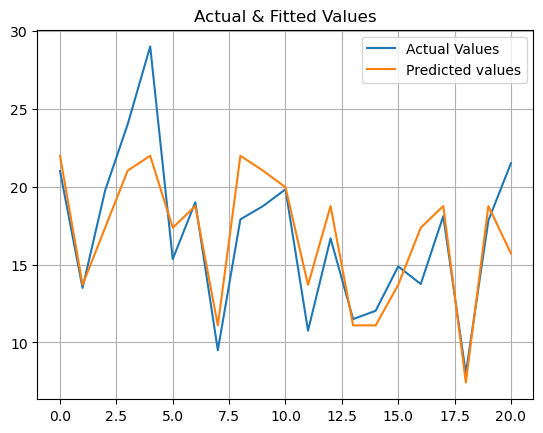

In [44]:
#plot for actual and fitted  values
plt.plot(time_data["Delivery"],label='Actual Values')
plt.plot(pred_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

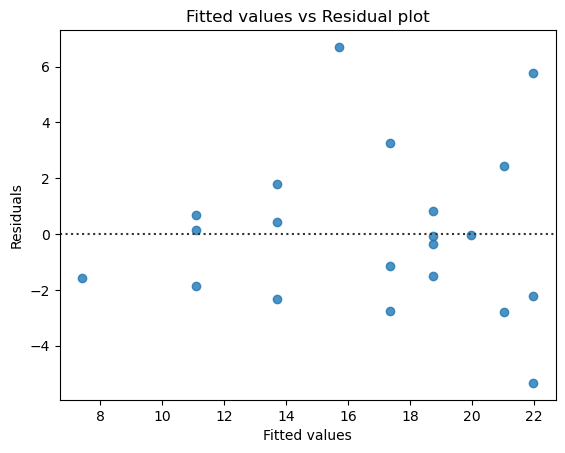

In [45]:
#Residual Vs Fitted Values Plot
sns.residplot(x=pred_y,y=linear_model.resid)
plt.title('Fitted values vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()